# Illustration of data set from S. Farsiu
https://people.duke.edu/~sf59/RPEDC_Ophth_2013_dataset.htm
stored in data/duke

Here is 3D volume OCT image of a retina from a healthy patient and a patient with AMD. 
This notebook is a quick example of how tha data look like (AMD vs healthy) and a representation of 3D data via gif file. 

In [7]:
from matplotlib import pyplot as plt
import os
from scipy import io
dirname = os.getcwd()
dirname=os.path.join(dirname,"..")
file_healthy=os.path.join("normal","Farsiu_Ophthalmology_2013_Control_Subject_1103.mat")
file_AMD=os.path.join("amd","Farsiu_Ophthalmology_2013_AMD_Subject_1265.mat")

def read_OCT(path):
	data = io.loadmat(path)   #data is a dictionary 
	return(data)

path=os.path.join(dirname, 'data','duke',file_healthy)
data=read_OCT(path)
plt.figure(figsize=(15,5))
print(data.keys())
print(data["images"].shape)

dict_keys(['__header__', '__version__', '__globals__', 'images', 'layerMaps', 'Age'])
(512, 1000, 100)


<Figure size 1080x360 with 0 Axes>

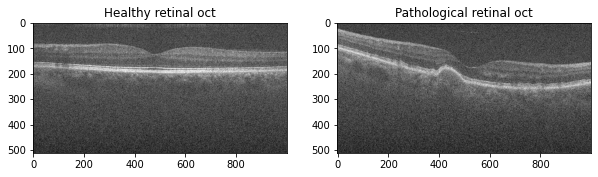

In [8]:
path=os.path.join(dirname, 'data','duke',file_healthy)
data_healthy=read_OCT(path)
path=os.path.join(dirname, 'data','duke',file_AMD)
data_AMD=read_OCT(path)

fig,ax=plt.subplots(1,2,figsize=(10,15))
h,w,d=data_healthy["images"].shape
ax[0].imshow( (data_healthy["images"][:,:,int(d/2)]),cmap="gray")
ax[0].set_title("Healthy retinal oct")
ax[1].imshow( (data_AMD["images"][:,:,int(d/2)]),cmap="gray")
ax[1].set_title("Pathological retinal oct")
plt.show()

In [9]:
import imageio
D3=data_healthy["images"][:,:].T
images=[]
for i in range(D3.shape[0]):
    images.append(D3[i].T)
imageio.mimsave('movie_healthy.gif', images)

D3=data_AMD["images"][:,:].T
images=[]
for i in range(D3.shape[0]):
    images.append(D3[i].T)
imageio.mimsave('movie_AMD.gif', images)

![image info](movie_healthy.gif)
![image info](movie_AMD.gif)